In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [21]:
df=pd.read_csv("yield_df.csv")
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [23]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [27]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [29]:
df.duplicated().sum()

2310

In [31]:
df.drop_duplicates(inplace=True)

In [33]:
df.duplicated().sum()

0

In [35]:
df.shape

(25932, 7)

In [37]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [43]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [45]:
df.corr(numeric_only=True)

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Year,1.000000,0.091327,-0.006423,0.135127,0.013701
hg/ha_yield,0.091327,1.000000,-0.004067,0.065523,-0.110400
average_rain_fall_mm_per_year,-0.006423,-0.004067,1.000000,0.161483,0.333694
pesticides_tonnes,0.135127,0.065523,0.161483,1.000000,0.045577
avg_temp,0.013701,-0.110400,0.333694,0.045577,1.000000


# Data Analysis & Visualization  

In [48]:
len(df['Area'].unique())

101

In [50]:
len(df['Item'].unique())

10

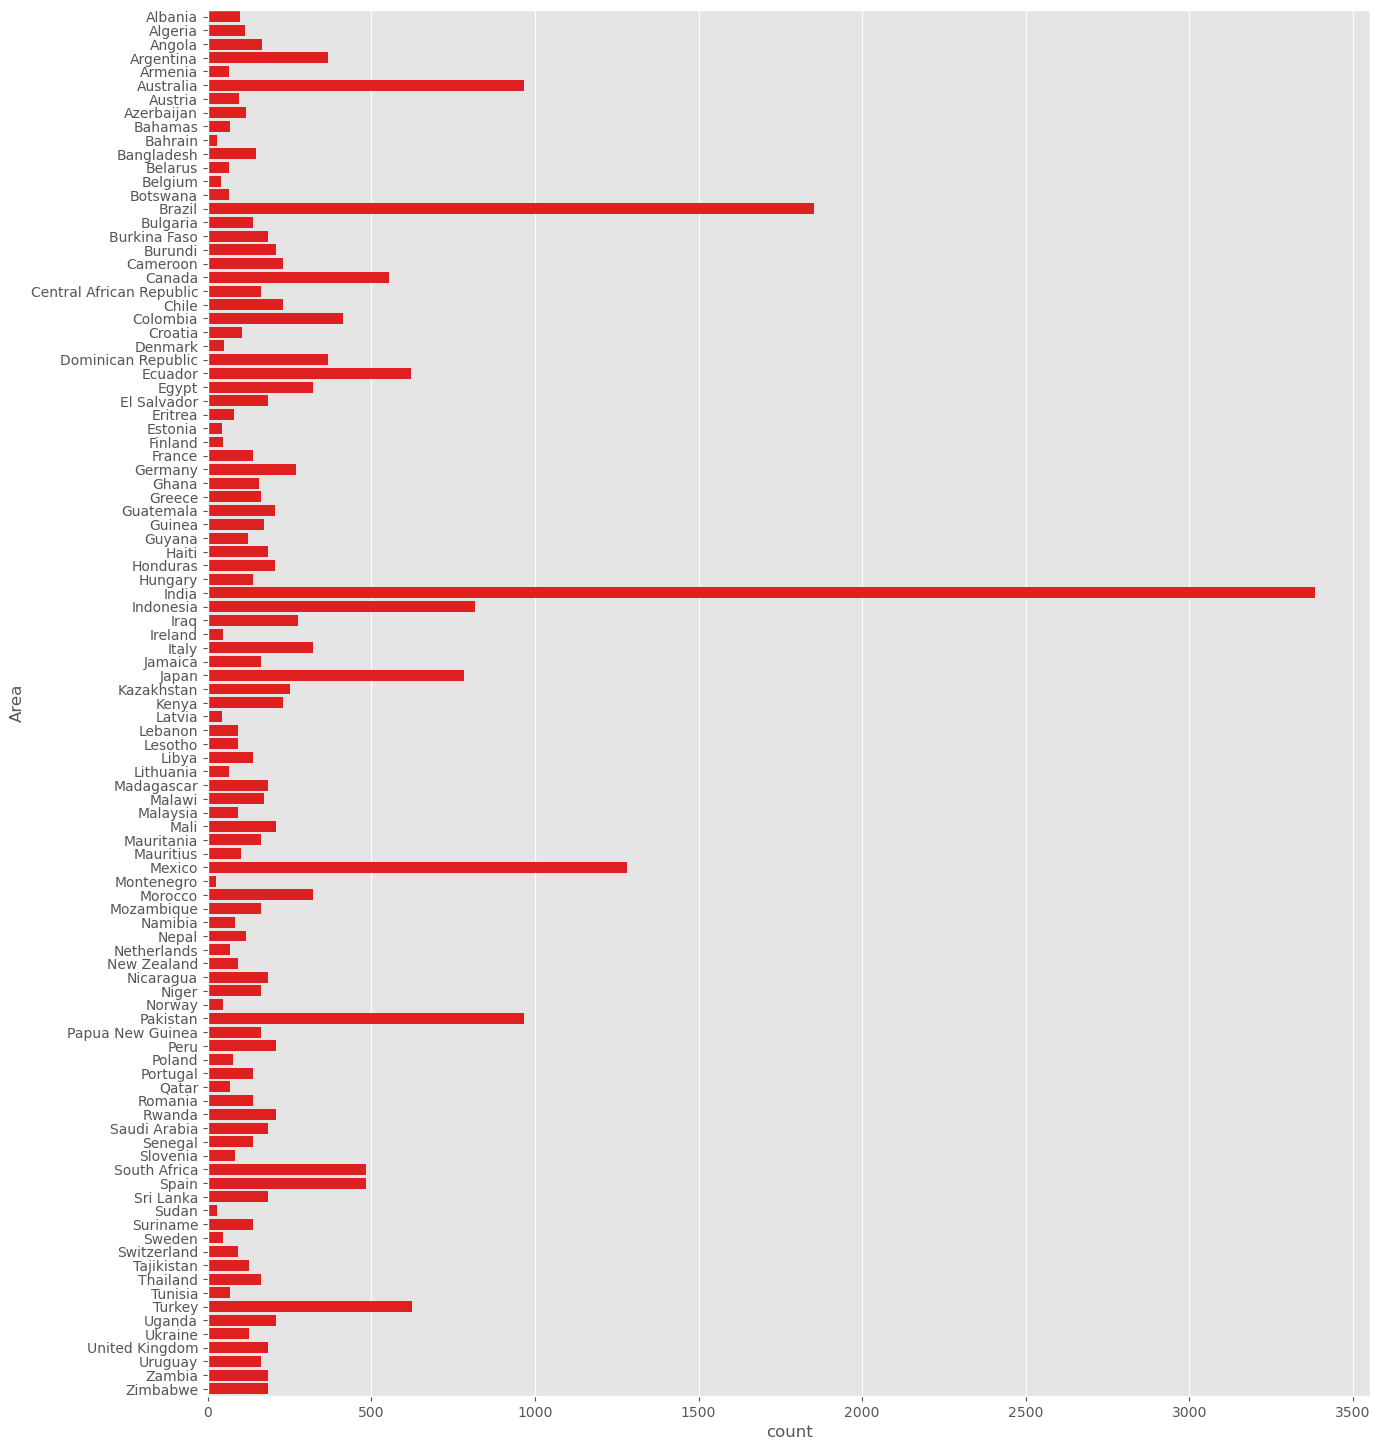

In [52]:
plt.figure(figsize=(15,18))
sns.countplot(y=df['Area'],color="red")
plt.show()

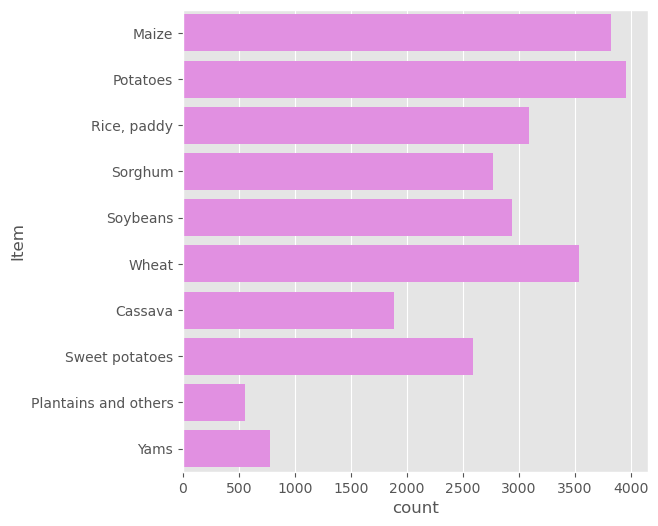

In [53]:
plt.figure(figsize=(6,6))
sns.countplot(y=df['Item'],color="violet")
plt.show()

In [56]:
(df['Area'].value_counts()<400).sum

<bound method Series.sum of Area
India         False
Brazil        False
Mexico        False
Australia     False
Pakistan      False
              ...  
Estonia        True
Belgium        True
Bahrain        True
Sudan          True
Montenegro     True
Name: count, Length: 101, dtype: bool>

In [58]:
country=df['Area'].unique()
yield_per_country=[]
for i in country:
    yield_per_country.append(df[df['Area']==i]['hg/ha_yield'].sum())

df['hg/ha_yield'].sum()

1996196943

<Axes: >

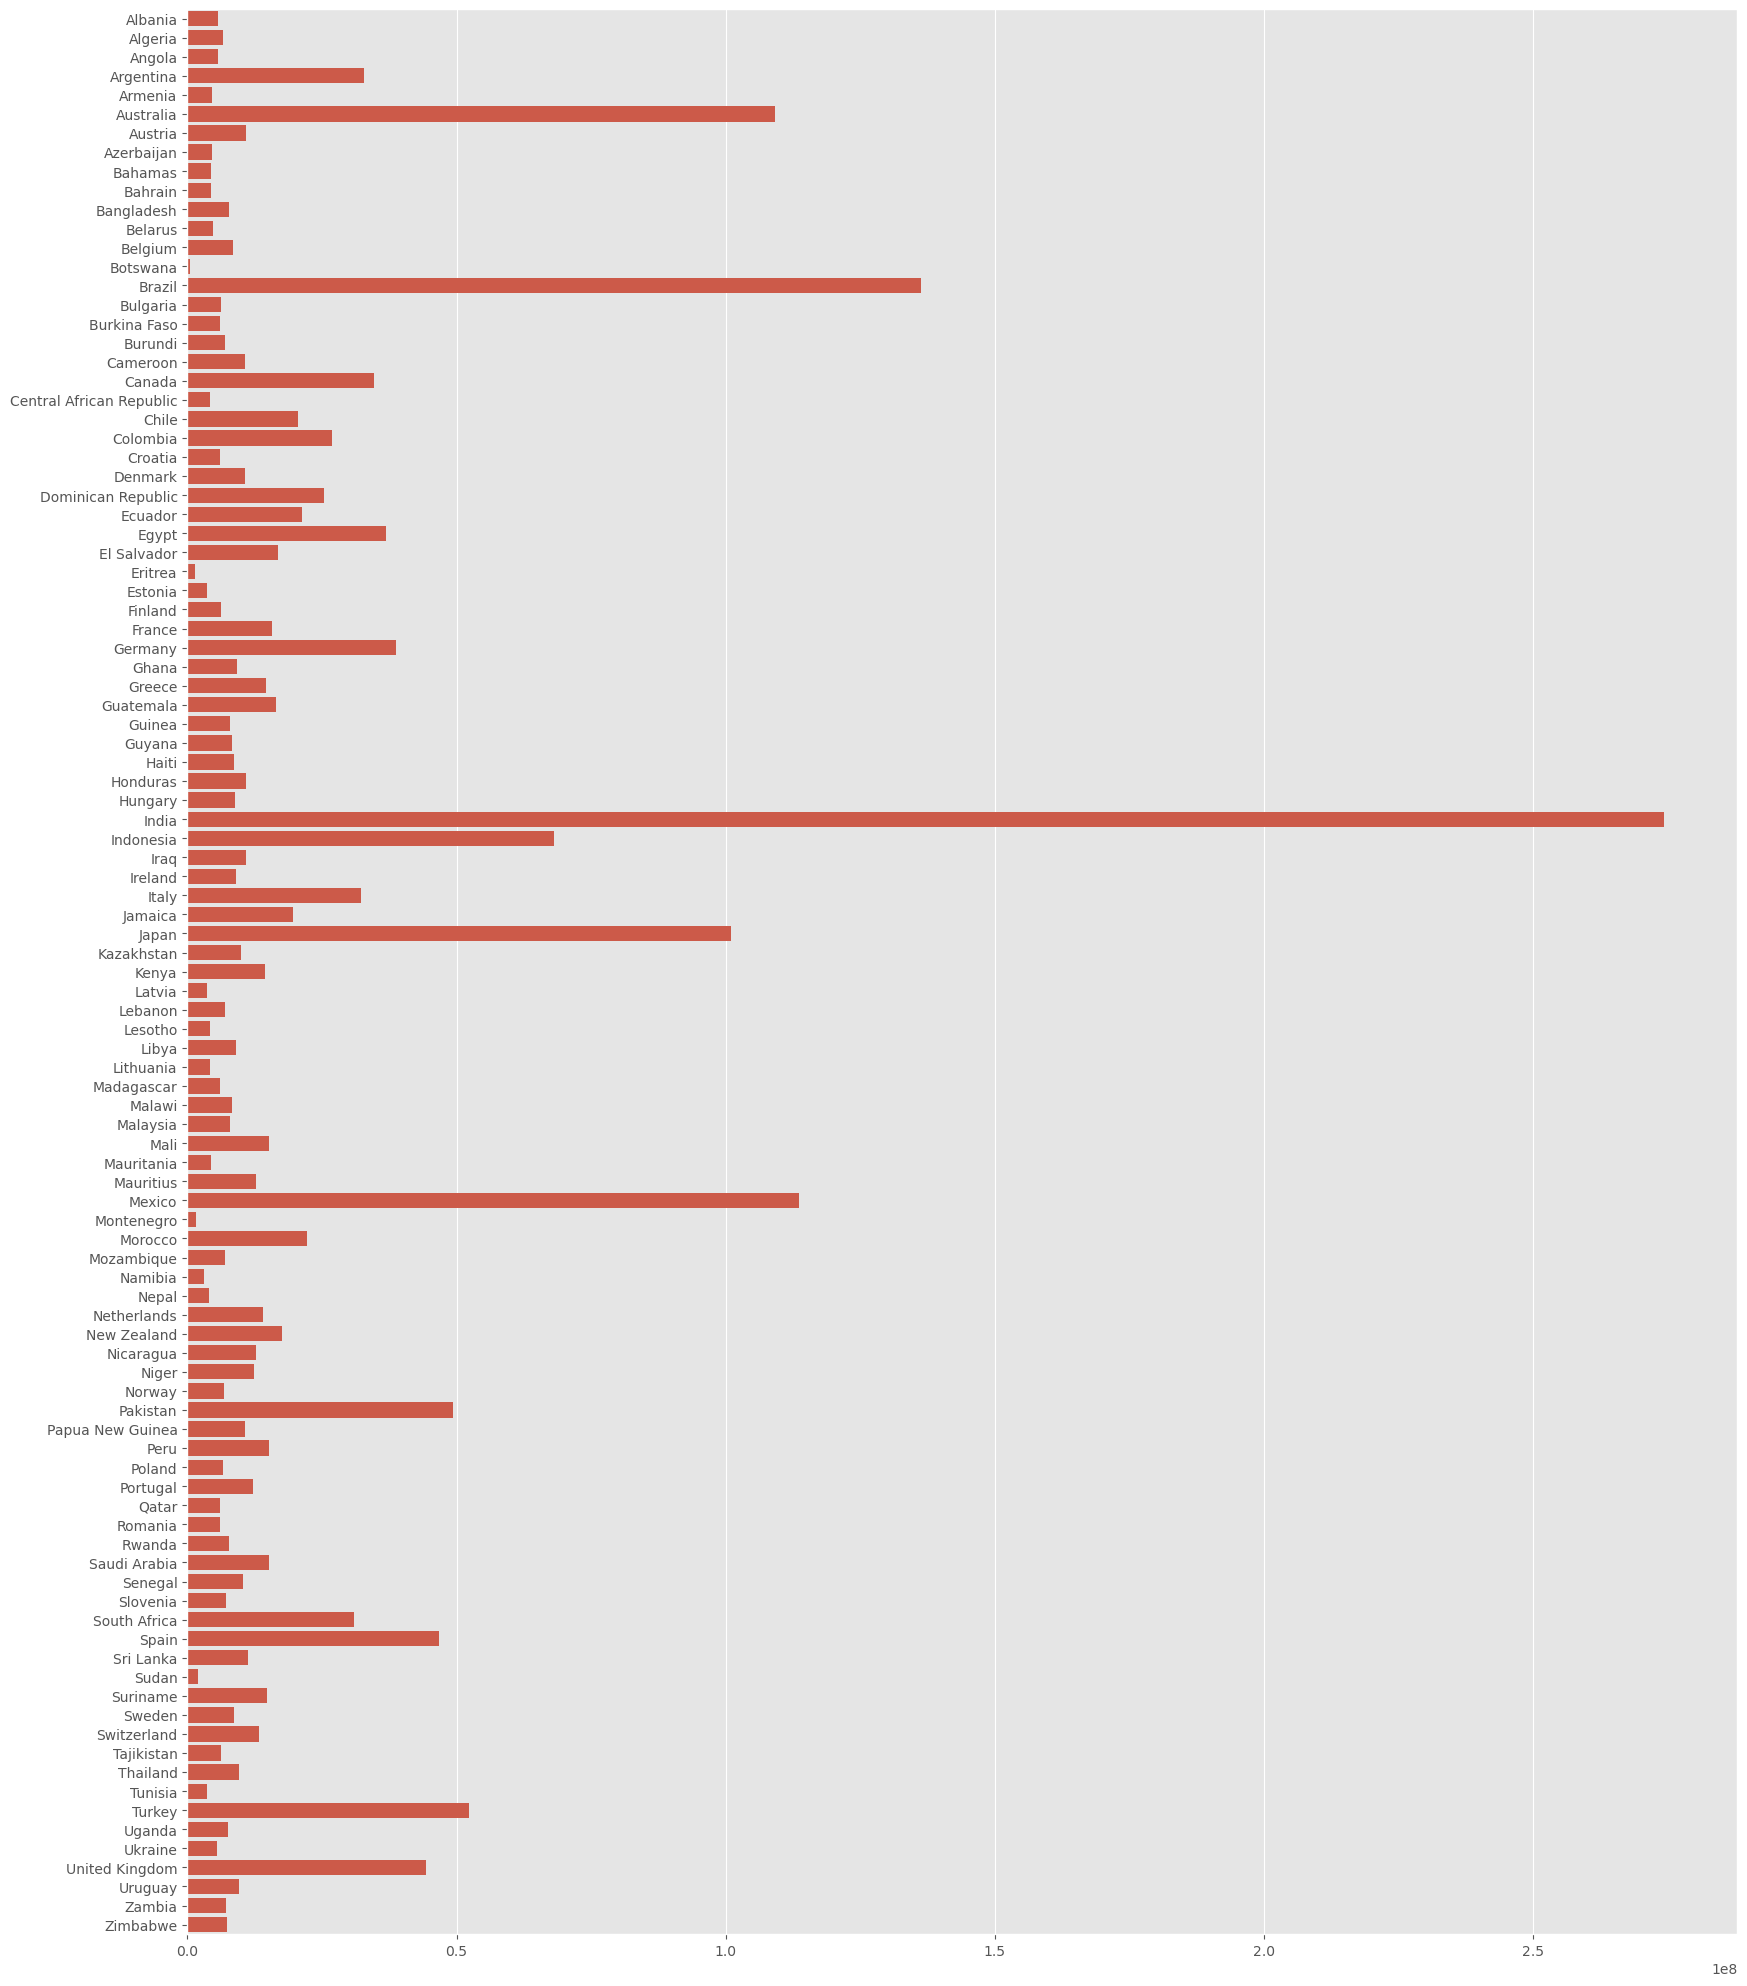

In [60]:
plt.figure(figsize=(20,25))
sns.barplot(x=yield_per_country,y=country)

In [62]:
crop=df['Item'].unique()
yield_per_crop=[]
for i in crop:
    yield_per_crop.append(df[df['Item']==i]['hg/ha_yield'].sum())

df['hg/ha_yield'].sum()

1996196943

<Axes: >

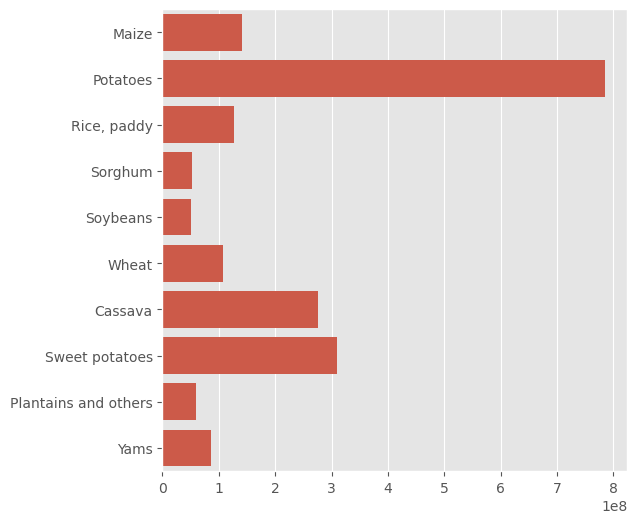

In [64]:
plt.figure(figsize=(6,6))
sns.barplot(x=yield_per_crop,y=crop)

In [66]:
x=df.drop('hg/ha_yield',axis=1)
y=df['hg/ha_yield']

In [68]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


# ML 

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=0,shuffle=True)

In [73]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score

import warnings
warnings.filterwarnings("ignore")


In [75]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocesser = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Area', 'Item'])
    ],
    remainder='drop'
)

x_train_dummy = preprocesser.fit_transform(x_train)
x_test_dummy = preprocesser.transform(x_test)

dtr = DecisionTreeRegressor()
dtr.fit(x_train_dummy, y_train)


DecisionTreeRegressor()

In [77]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
}

for name, md in models.items():
    md.fit(x_train_dummy,y_train)
    y_pred = md.predict(x_test_dummy)
    print(f"{name}: mae : {mean_absolute_error(y_test, y_pred)} score : {r2_score(y_test, y_pred)}")

Linear Regression: mae : 30252.254497866896 score : 0.7422227447346006
Lasso: mae : 30223.836375894807 score : 0.7423620745834434
Ridge: mae : 30042.866751059977 score : 0.7428787995832973
Decision Tree: mae : 8849.711558854719 score : 0.9282900577271019
KNN: mae : 15554.664128024679 score : 0.871566769960038


In [78]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train_dummy,y_train)
dtr.predict(x_test_dummy)

array([41004., 29053., 24008., ..., 40466., 66187., 22744.])

In [79]:
def prediction(Area, Item, Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp):
    features = pd.DataFrame([{
        'Area': Area,
        'Item': Item,
        'Year': Year,
        'average_rain_fall_mm_per_year': average_rain_fall_mm_per_year,
        'pesticides_tonnes': pesticides_tonnes,
        'avg_temp': avg_temp
    }])
    transform_features = preprocesser.transform(features)
    predicted_yield = dtr.predict(transform_features).reshape(-1, 1)
    return predicted_yield[0][0]


In [88]:
result = prediction('Albania', 'Maize', 1990, 1485.0, 121.0, 16.37)
print("Predicted yield (hg/ha):", result)

Predicted yield (hg/ha): 16770.0


In [90]:
import pickle
pickle.dump(dtr, open("dtr.pkl", "wb"))
pickle.dump(preprocesser, open("preprocesser.pkl", "wb"))

In [93]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = dtr.predict(x_test_dummy)

print("R² Score:", round(r2_score(y_test, y_pred), 4))
print("MAE:", round(mean_absolute_error(y_test, y_pred), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))

R² Score: 0.9229
MAE: 9038.11
RMSE: 23518.25
